In [ ]:
Specifict:
Berapa jumlah total sewa sepeda (cnt) untuk tahun 2011 selama musim semi (musim 1)?
Berapa jumlah total sewa sepeda (cnt) untuk tahun 2012 selama musim semi (musim 1)?

Measurable:
Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011?
Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2012?

Action-oriented:
Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?
Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari libur (hari libur = 0)?

Relevant:
Apa hubungan suhu (temp) dengan jumlah pengguna yang terdaftar (registered)?
Apa hubungan suhu (temp) dengan jumlah pengguna biasa (casual)?
Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) selama musim gugur (season 3)?

Time-bound:

Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (hari libur = 1) pada tahun 2012 (tahun = 1)?

In [1]:
# Library
import pandas as pd
import plotly.express as px

import warnings

d:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
### data warngling
## gathering data
df_day = pd.read_csv("dataset/day.csv")
# display("this is df_day: ", df_day)

df_hour = pd.read_csv("dataset/hour.csv")
# display("this is df_hour: ", df_hour)

In [8]:
## assessing data
print('Dataframe day:')
print(df_day.info())

print('\nDataframe hour:')
print(df_hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

In [9]:
# checking missing value
print('Dataframe day:')
print(df_day.isna().sum())

print('\nDataframe hour:')
print(df_hour.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
# checking duplicated data
print('Dataframe day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


In [13]:
#  do descriptive statistics
display(df_day.describe())
display(df_hour.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
### cleaning data
## fixing data type
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Check data type for df_day and df_hour
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


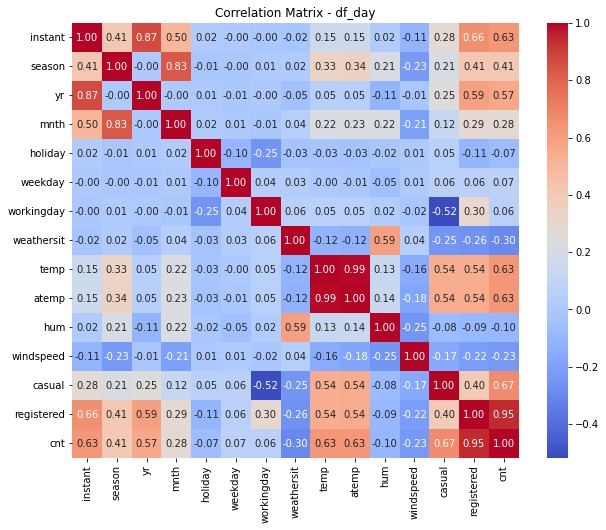

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

### EDA
# korelasi antar variable numeric
warnings.filterwarnings("ignore")

# df_day
correlation_matrix = df_day.corr()
# fig = px.imshow(correlation_matrix)
# fig.update_layout(title="Korelasi antara Variabel Numerik")
# fig.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - df_day')
plt.show()

In [19]:
# distribusi variable numeric
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_cols:
    fig = px.histogram(df_day, x=col, title=f'Distribusi {col}')
    fig.show()

In [21]:
# distribusi variable categorical
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    fig = px.bar(df_day[col].value_counts().reset_index(), x='index', y=col)
    fig.update_layout(title=f'Distribusi {col}')
    fig.show()

In [22]:
# relation antar musim/season dan jumlah sewa/cnt
fig = px.box(df_day, x='season', y='cnt')
fig.update_layout(title='Hubungan antara Musim dan Jumlah Sewa')
fig.show()

In [23]:
# relation antar hari libur/holiday dan jumlah sewa/cnt
fig = px.box(df_day, x='holiday', y='cnt')
fig.update_layout(title='Hubungan antara Hari Libur dan Jumlah Sewa')
fig.show()

In [24]:
# relation antar cuaca/wathersit dan jumlah sewa/cnt
fig = px.box(df_day, x='weathersit', y='cnt')
fig.update_layout(title='Hubungan antara Cuaca dan Jumlah Sewa')
fig.show()

In [25]:
# scatter plot antar suhu/temp dan jumlah sewa/cnt
fig = px.scatter(df_day, x='temp', y='cnt', title='Scatter Plot antara Suhu dan Jumlah Sewa')
fig.show()

In [26]:
### visualization dan explanatory analysis

In [27]:
df_day.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [28]:
# berapa jumlah total sewa sepeda/ sum cnt untuk tahun 2011,2012 dan musim gugur/musim semi
filtered_data = df_day[(df_day["yr"] == 1) & (df_day["season"] == 1)]

# Hitung jumlah total sewa sepeda (cnt)
total_sewa_sepeda = filtered_data["cnt"].sum()

print("Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3):", total_sewa_sepeda)

Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3): 321348


In [29]:
# berapa jumlah total sewa sepeda/ sum cnt untuk tahun 2011,2012 dan musim gugur/musim semi
filtered_data = df_day[(df_day["yr"] == 1) & (df_day["season"] == 3)]

# Hitung jumlah total sewa sepeda (cnt)
total_sewa_sepeda = filtered_data["cnt"].sum()

print("Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3):", total_sewa_sepeda)

Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur (musim 3): 641479


In [32]:
# berapa jumlah total sewa sepeda/ sum cnt untuk tahun 2011,2012 dan musim gugur/musim semi

# Filter tahun 2011, musim panas (season 2), dan hari libur (holiday = 1)
filtered_data = df_day[(df_day["yr"] == 0) & (df_day["season"] == 2) & (df_day["holiday"] == 1)]

# Hitung jumlah total sepeda sewaan
total_sepeda_sewaan = filtered_data["cnt"].sum()

print("Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011:", total_sepeda_sewaan)

Jumlah total sepeda sewaan yang digunakan pada hari libur selama musim panas tahun 2011: 7224


In [36]:
df_day.workingday.unique()

array([0, 1], dtype=int64)

In [33]:
# 3. Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?

# Filter pengguna casual (casual) pada hari kerja (workingday = 1)
filtered_data = df_day[(df_day["workingday"] == 1) & (df_day["casual"] > 0)]

# Visualisasikan jumlah sewa sepeda casual pada hari kerja
fig = px.bar(filtered_data, x="weekday", y="casual", title="Jumlah Sewa Sepeda Casual pada Hari Kerja")
fig.update_xaxes(title="Hari Kerja")
fig.update_yaxes(title="Jumlah Sewa Sepeda Casual")
fig.show()

In [37]:
# 4. Apa hubungan suhu (temp) dengan jumlah pengguna yang terdaftar?

# Buat scatter plot dengan Plotly untuk memvisualisasikan hubungan suhu (temp) dengan jumlah pengguna terdaftar (registered)
fig = px.scatter(df_day, x="temp", y="registered", title="Hubungan Suhu dengan Jumlah Pengguna Terdaftar")
fig.update_xaxes(title="Suhu (temp)")
fig.update_yaxes(title="Jumlah Pengguna Terdaftar")
fig.show()

In [38]:
# 5. Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) selama musim gugur (season 3)?

# Filter musim gugur (season 3)
filtered_data = df_day[df_day["season"] == 3]

# Buat plot dengan Plotly untuk menganalisis pengaruh cuaca terhadap jumlah sewa sepeda
fig = px.bar(filtered_data, x="weathersit", y="cnt", title="Pengaruh Cuaca terhadap Jumlah Sewa Sepeda (Musim Gugur)")
fig.update_xaxes(title="Cuaca (weathersit)")
fig.update_yaxes(title="Jumlah Sewa Sepeda (cnt)")

# Tampilkan plot
fig.show()

In [42]:
# 6. Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (hari libur = 1) pada tahun 2012 (tahun = 1)?

# Filter data tahun 2012 (yr = 1), Hari Natal (holiday = 1), dan musim panas (season 2)
filtered_data = df_hour[(df_hour["yr"] == 1) & (df_hour["holiday"] == 1) & (df_hour["season"] == 4)]

# Hitung distribusi per jam sewa sepeda (cnt)
distribusi_per_jam = filtered_data.groupby("hr")["cnt"].sum()

print("Distribusi per jam sewa sepeda pada Hari Natal tahun 2012:")
print(distribusi_per_jam)

Distribusi per jam sewa sepeda pada Hari Natal tahun 2012:
hr
0      146
1      109
2       53
3       20
4       14
5       51
6      147
7      474
8     1034
9      848
10     783
11     907
12    1022
13    1094
14    1084
15     980
16     993
17    1202
18    1077
19     768
20     583
21     352
22     263
23     168
Name: cnt, dtype: int64


In [50]:
import plotly.express as px
import calendar

# Assuming 'df_day' is your DataFrame with daily bike share data
daily_counts_by_weekday = df_day.groupby("weekday")["cnt"].sum().reset_index()

# Map weekday numbers to day names
daily_counts_by_weekday["weekday"] = daily_counts_by_weekday["weekday"].apply(lambda x: calendar.day_name[x])

fig_daily_count = px.line(
    daily_counts_by_weekday, x="weekday", y="cnt", title="Daily Bike Share Count by Weekday"
)
fig_daily_count.update_xaxes(title="Weekday")
fig_daily_count.update_yaxes(title="Bike Share Count")
fig_daily_count.show()

In [57]:
import plotly.express as px

# Assuming 'df_day' is your DataFrame with daily bike share data
# Grouping by both weekday and humidity and aggregating the bike rental counts
humidity_vs_cnt = df_day.groupby(["hum"])["cnt"].sum().reset_index()

# Map weekday numbers to day names
# humidity_vs_cnt["weekday"] = humidity_vs_cnt["weekday"].apply(lambda x: calendar.day_name[x])

# Creating a line plot
fig = px.line(humidity_vs_cnt, x="hum", y="cnt",
              title="Bike Share Count vs. Humidity by Weekday")
fig.update_xaxes(title="Humidity")
fig.update_yaxes(title="Bike Share Count")
fig.show()

In [54]:
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [52]:
hourly_count = df_hour.groupby("hr")["cnt"].sum().reset_index()
fig_hourly_count = px.line(
    hourly_count, x="hr", y="cnt", title="Hourly Bike Share Count")

fig_humidity_chart = px.scatter(
    df_hour, x="hum", y="cnt", title="Humidity vs. Bike Share Count")
fig_humidity_chart

In [ ]:
pandas==1.5.3
streamlit==1.28.2
matplotlib==3.7.1